# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 

<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [89]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### ToDo 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [90]:
df = pd.read_csv("ab_data.csv")

**b.** Use the cell below to find the number of rows in the dataset.

In [91]:
df.shape


(294478, 5)

**c.** The number of unique users in the dataset.

In [92]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

**d.** The proportion of users converted.

In [93]:
df["converted"].mean() * 100

11.96591935560551

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [94]:
len(df.query("group == 'treatment' and landing_page !='new_page'"))

1965

**f.** Do any of the rows have missing values?

In [95]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### ToDo 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [96]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df.drop(df.query("group == 'treatment' and landing_page == 'old_page'").index, inplace = True)
df.drop(df.query("group == 'control' and landing_page == 'new_page'").index, inplace = True)
df2 = df



In [97]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### ToDo 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [98]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [99]:
df2[df2.duplicated(['user_id'], keep=False)]['user_id']


1899    773192
2893    773192
Name: user_id, dtype: int64

**c.** Display the rows for the duplicate **user_id**? 

In [100]:
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [101]:
# Remove one of the rows with a duplicate user_id..
# Hint: The dataframe.drop_duplicates() may not work in this case because the rows with duplicate user_id are not entirely identical. 
df2 = df2.drop_duplicates(subset = 'user_id', keep = 'first')
# Check again if the row with a duplicate user_id is deleted or not
df2[df2.duplicated(['user_id'], keep = False)]

,user_id,timestamp,group,landing_page,converted


### ToDo 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>



In [102]:
df2['converted'].mean()

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [103]:
group_prob = df2.groupby("group").mean()
control_prob = group_prob.iloc[:1]
control_prob = control_prob['converted'].values

print(control_prob)

[0.1203863]


**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [104]:
treatment_prob = group_prob.iloc[1:]
treatment_prob = treatment_prob['converted'].values
print(treatment_prob)

[0.11880807]


>**Tip**: The probabilities you've computed in the points (b). and (c). above can also be treated as conversion rate. 
Calculate the actual difference  (`obs_diff`) between the conversion rates for the two groups. You will need that later.  

In [105]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_prob - control_prob 
print("Actual Difference = ", obs_diff)

Actual Difference =  [-0.00157824]


**d.** What is the probability that an individual received the new page?

In [106]:
new_page = len(df.query(("group == 'treatment'")))
total_users = df.shape[0]
new_page_prob = new_page/total_users
print(df['landing_page'].describe())
print('Probability an individual received new page: ', new_page_prob)


count       290585
unique           2
top       new_page
freq        145311
Name: landing_page, dtype: object
Probability an individual received new page:  0.5000636646764286


**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

The probabilty a user convert when using the old page is 0.1203863
The probability a user converted when using the new page is 0.11880807
The actual difference between the probability of conversion between the old page and new page is -0.00157824. 
We can conclude the old page leads to slightly more conversions. Though, I recommend further anaylsis due to not determining other outliers such as change aversion.. 

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### ToDo 2.1
For now, consider you need to make the decision just based on all the data provided.  

> Recall that you just calculated that the "converted" probability (or rate) for the old page is *slightly* higher than that of the new page (ToDo 1.4.c). 

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the "converted" probability (or rate) for the old and new pages respectively.

Hypothesis: 

**$H_0$**: The newer webpage does no better, or even worse, converting website visitors into customers than the older page.
<Br>**$H_1$**: The newer webpage does better converting website visitors into customers than the older page.

### ToDo 2.2 - Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [107]:
p_new = df2['converted'].mean()
print(p_new)

0.11959708724499628


**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [108]:
p_old = df2['converted'].mean()
print(p_old)

0.11959708724499628


**c.** What is $n_{new}$, the number of individuals in the treatment group? <br><br>
*Hint*: The treatment group users are shown the new page.

In [109]:
n_new = len(df2.query('group == "treatment"'))
print(n_new)

145310


**d.** What is $n_{old}$, the number of individuals in the control group?

In [110]:
n_old = len(df2.query('group == "control"'))
print(n_old)

145274


**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.  <br><br>


In [111]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [112]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)])


**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [113]:
converted_prob_diff = p_new - p_old
print(converted_prob_diff)

0.0



**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

<br>
Store all  $(p{'}_{new}$ - $p{'}_{old})$  values in a NumPy array called `p_diffs`.

In [28]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([1, 0], size=n_new, p=[p_new, (1-p_new)]).mean()
    old_page_converted = np.random.choice([1, 0], size=n_old, p=[p_old, (1-p_old)]).mean()
    diff = new_page_converted - old_page_converted 
    p_diffs.append(diff)


**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

Also, use `plt.axvline()` method to mark the actual difference observed  in the `df2` data (recall `obs_diff`), in the chart.  

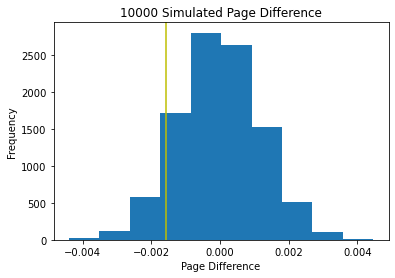

In [114]:

plt.hist(p_diffs)
plt.xlabel('Page Difference')
plt.ylabel('Frequency')
plt.title('10000 Simulated Page Difference')
plt.axvline(x= obs_diff, color='y');


**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [115]:
(obs_diff < p_diffs).mean()


0.9071

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages? *Hint*: Compare the value above with the "Type I error rate (0.05)". 

In part J we took the actual difference, obs_diff (the actual difference between the conversion rates for the treatment and controls groups.) that was computed earlier in the project from the original dataset and calulated the proportion of the p_diffs that are greater than the actual difference. 

The value is called P value and it is the probability of observing your statistic (or one more extreme in favor of the alternative) if the null hypothesis is true.

Since the P value (.9071) is above the Type 1 error rate of 0.5 and the old page perform similiarly with the new page with the old page performing slightly better than the new page. Thus, the results are not stastically significantly and the null hypothesis is true. 



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 

Fill in the statements below to calculate the:
- `convert_old`: number of conversions with the old_page
- `convert_new`: number of conversions with the new_page
- `n_old`: number of individuals who were shown the old_page
- `n_new`: number of individuals who were shown the new_page


In [65]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = sum(df2.query('group == "control"')['converted'])
# number of conversions with the new_page
convert_new =sum(df2.query('group == "treatment"')['converted'])

# number of individuals who were shown the old_page
n_old = len(df2.query('group == "control"'))

# number of individuals who received new_page
n_new = len(df2.query('group == "treatment"'))

print(convert_old, convert_new, n_old, n_new)

17489 17264 145274 145310


**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

The built-in function above will return the z_score, p_value. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


>Z-test is performed when the sample size is large, and the population variance is known. The z-score represents the distance between the two "converted" success rates in terms of the standard error. 

Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.

>Hint:<br>
For a right-tailed test, reject null if $Z_{score}$ > $Z_{\alpha}$. <br>
For a left-tailed test, reject null if $Z_{score}$ < $Z_{\alpha}$. 




Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

>**Tip**: You don't have to dive deeper into z-test for this exercise. **Try having an overview of what does z-score signify in general.** 

In [116]:
import statsmodels.api as sm
# ToDo: Complete the sm.stats.proportions_ztest() method arguments
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new],[n_old,n_new], alternative = 'smaller')
print(z_score, p_value)

1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Tip**: Notice whether the p-value is similar to the one computed earlier. Accordingly, can you reject/fail to reject the null hypothesis? It is important to correctly interpret the test statistic and p-value.

- The z_score of 1.3109241984234394  and p-value of 0.9050583127590245 agree with the values computed in the earlier question (k) and agree with the findings. Both p-value's are not signicant enough thus we fail to reject the null hypothesis.

<a id='regression'></a>
### Part III - A regression approach

### ToDo 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic Regression

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [117]:
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2['intercept'] = 1


C:\Users\Kamri\AppData\Local\Temp\ipykernel_3192\2907204660.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
C:\Users\Kamri\AppData\Local\Temp\ipykernel_3192\2907204660.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['intercept'] = 1


**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [118]:
log_mod = sm.Logit(df2['converted'], df2[['ab_page','intercept']])
results = log_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [119]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Dec 2022   Pseudo R-squ.:               8.077e-06
Time:                        17:26:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  


>The p-value associated with ab_page is 0.190. It differs from the value found in part because the Logisitc Regression is based on a two-tailed test instead of a one tailed test from our previous two examples.. 
>Adding an intercept accounts for any bias thus making the p_value truer than the previous computed value in Part II.
>This current p-value is still high enough that we cannot reject the null hypothesis

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>Other factors that may influence whether or not an individual may converts is if the user has a disability. The newer page may be more disability-friendly than the older page. 
>A disadvantage to may be adding factors that will not have a big inpact on the confidance interval, such as the user's computer model. 

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 


In [130]:
# Read the countries.csv
country = pd.read_csv('countries.csv')
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290584 entries, 0 to 290583
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   user_id  290584 non-null  int64 
 1   country  290584 non-null  object
dtypes: int64(1), object(1)
memory usage: 4.4+ MB


>Country did not have an impact on conversions. 

In [131]:
# Join with the df2 dataframe
df3 = df2.join(country, lsuffix = 'userid')
df3.head()

,user_iduserid,timestamp,group,landing_page,converted,ab_page,intercept,user_id,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,834778.0,UK
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,928468.0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,822059.0,UK
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,711597.0,UK
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,710616.0,UK


In [133]:
# Create the necessary dummy variables
df3[['US','UK','CA']] = pd.get_dummies(df3['country'])
#Dropping Country column we no longer need
df3 = df3.drop(columns = 'country')
df3.head()


,user_iduserid,timestamp,group,landing_page,converted,ab_page,intercept,user_id,US,UK,CA
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,834778.0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,928468.0,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,822059.0,0,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,711597.0,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,710616.0,0,1,0


In [138]:
df3['US_ab_page'] = df3['US'] * df3['ab_page']
df3['UK_ab_page'] = df3['UK'] * df3['ab_page']
df3['CA_ab_page'] = df3['CA'] * df3['ab_page']
df3.head(1)

,user_iduserid,timestamp,group,landing_page,converted,ab_page,intercept,user_id,US,UK,CA,US_ab_page,UK_ab_page,CA_ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,834778.0,0,1,0,0,0,0


**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


Provide the summary results (statistical output), and your conclusions (written response) based on the results. 


In [139]:
# Fit your model, and summarize the results

log_mod = sm.Logit(df3['converted'], df3[['intercept', 'US_ab_page', 'UK_ab_page', 'CA_ab_page']])
results = log_mod.fit()
results.summary2()


Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212783.7595
Date:               2022-12-18 17:31 BIC:              212826.0781
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.51075    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9887    0.0080  -248.3064  0.0000  -2.0044  -1.9730
US_ab_page   -0.0037    0.0372    -0.0982  0.9217  -0.0765   0.0692
UK_ab_page   -0.0069    0.0182    -0.3789  0.7048  -0.0426   0.0288
CA_ab_page   -0.0191    0.0126    -1.5143  0.1299  -0.0439   0.0056
==================================================================

"""

In [141]:
np.exp(results.params)

intercept     0.136870
US_ab_page    0.996354
UK_ab_page    0.993127
CA_ab_page    0.981067
dtype: float64

<b>Summary - </b>
The p-values are greater then the type I error rate of .05 and each country has a similiar chance of the ab_page converting a user based on computing values (.996,.993, .981) 
I will fail to reject the null hypothesis based on these results. 


In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])